In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\JVS Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
import pandas as pd
data = pd.read_csv('wavefiles.csv')
data

,file_name,classID,label
0,melody0.wav,1,antiviral
1,melody1.wav,1,antiviral
2,melody2.wav,1,antiviral
3,melody3.wav,1,antiviral
4,melody4.wav,1,antiviral
...,...,...,...
1698,melody1698.wav,4,anti-coronavirus
1699,melody1699.wav,4,anti-coronavirus
1700,melody1700.wav,4,anti-coronavirus
1701,melody1701.wav,4,anti-coronavirus


In [4]:
Directory = 'C:/Users/JVS Tanish/Downloads/MidMinorProject/music-melodies'

In [5]:
from tqdm import tqdm
import os
extracted_data = []
for index,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(Directory),str(row["file_name"]))
    class_labels= row["label"]
    y,sr = librosa.load(file_name, res_type='kaiser_fast')
    feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    scaled_feature = np.mean(feature.T,axis=0)
    extracted_data.append([scaled_feature, class_labels])

1703it [04:50,  5.86it/s]


In [6]:
feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])

In [7]:
x = np.array(feature_df['feature'].tolist())

In [8]:
y = np.array(feature_df['class'].tolist())

In [9]:
print(x.shape)
print(y.shape)

(1703, 50)
(1703,)


In [10]:
from sklearn import preprocessing

OHE_Function = OneHotEncoder()
Scaler_Function = StandardScaler()

In [11]:
Part_Y_Encode = OHE_Function.fit_transform(np.array(y).reshape(-1,1)).toarray()
print(Part_Y_Encode.shape)

(1703, 4)


In [12]:
Part_Y_Encode

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Part_Y_Encode, train_size=0.8, random_state = 42, shuffle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1362, 50)
(1362, 4)
(341, 50)
(341, 4)


In [14]:
n_seq = 1
n_steps = 50
X_train = X_train.reshape(X_train.shape[0], n_seq, n_steps)
X_test = X_test.reshape(X_test.shape[0], n_seq, n_steps)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(1362, 1, 50)
(341, 1, 50)
(1362, 4)


In [15]:
output_labels = 4
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = "adam"

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.models import Sequential


#Adding the input LSTM network layer
LSTM_model= Sequential()
LSTM_model.add(LSTM(128, input_shape=(1,50), return_sequences=True))
LSTM_model.add(Dropout(0.2))
# model_LSTM.add(Dense(10, activation='softmax'))

#Adding a second LSTM network layer
LSTM_model.add(LSTM(128))

#Adding a dense hidden layer
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dropout(0.2))

#Adding the output layer
LSTM_model.add(Dense(output_labels, activation='softmax'))
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            91648     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 231,748
Trainable params: 231,748
Non-trai

In [17]:
LSTM_model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [18]:
import tensorflow as tf
Call_Back_Early_Stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Call_Back_Check_Hybrid = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_LSTM_model")

In [25]:
LSTM_Model = LSTM_model.fit(X_train, Y_train, epochs=200, batch_size=128, validation_data=(X_test, Y_test), callbacks=[Call_Back_Early_Stop,Call_Back_Check_Hybrid])

Epoch 1/200
11/11 [==============================] - 0s 25ms/step - loss: 0.7975 - accuracy: 0.6902 - val_loss: 0.9035 - val_accuracy: 0.6745
Epoch 2/200
11/11 [==============================] - 0s 22ms/step - loss: 0.7934 - accuracy: 0.6872 - val_loss: 0.8922 - val_accuracy: 0.6774
Epoch 3/200
11/11 [==============================] - 0s 21ms/step - loss: 0.7866 - accuracy: 0.6960 - val_loss: 0.9003 - val_accuracy: 0.6657
Epoch 4/200
11/11 [==============================] - 0s 19ms/step - loss: 0.7899 - accuracy: 0.6909 - val_loss: 0.9127 - val_accuracy: 0.6510
Epoch 5/200
11/11 [==============================] - 0s 20ms/step - loss: 0.7787 - accuracy: 0.6960 - val_loss: 0.9279 - val_accuracy: 0.6657
Epoch 6/200
11/11 [==============================] - 0s 20ms/step - loss: 0.7802 - accuracy: 0.6938 - val_loss: 0.8893 - val_accuracy: 0.6716
Epoch 7/200
11/11 [==============================] - 0s 20ms/step - loss: 0.7826 - accuracy: 0.6946 - val_loss: 0.9269 - val_accuracy: 0.6628
Epoch 

In [26]:
train_accuracy = LSTM_model.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy of LSTM: ", train_accuracy[1])

test_accuracy = LSTM_model.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy of LSTM: ", test_accuracy[1])

Training Accuracy of LSTM:  0.7459618449211121
Testing Accuracy of LSTM:  0.6656891703605652


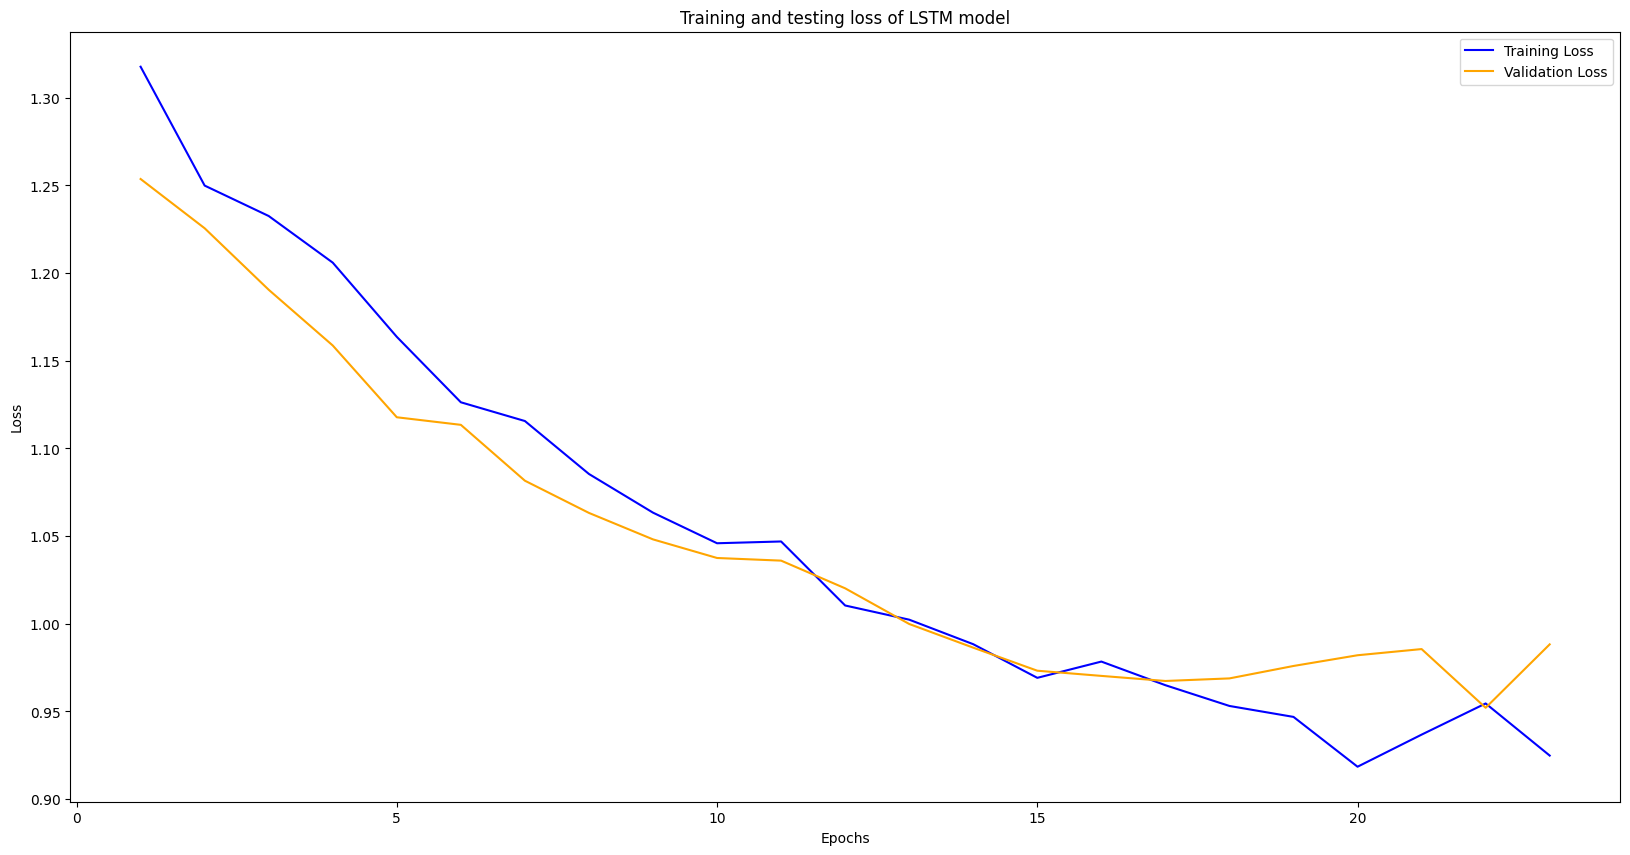

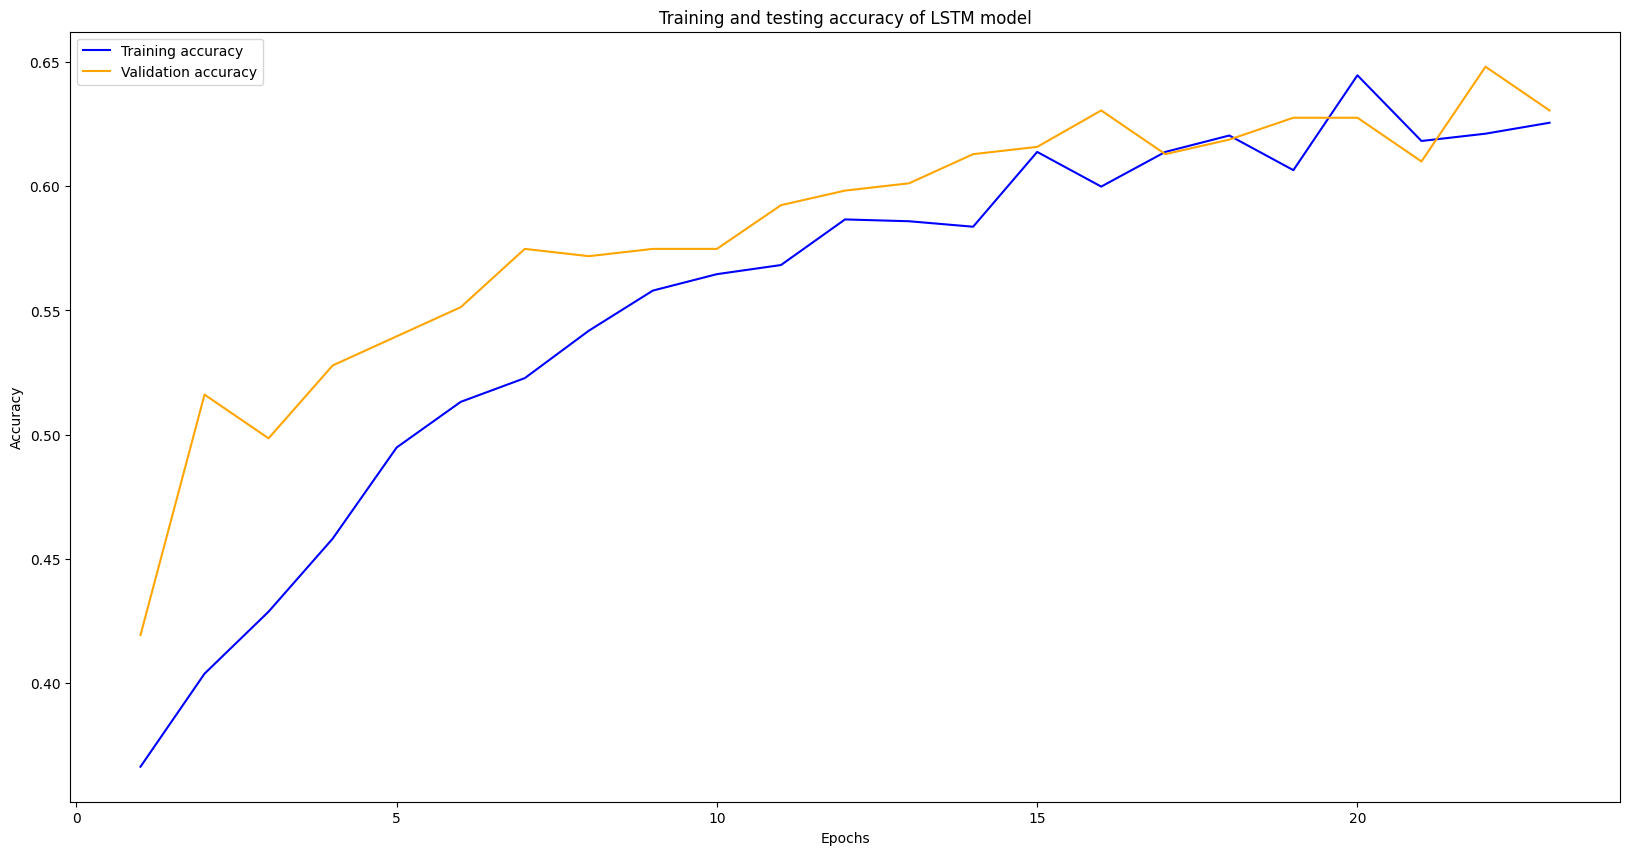

In [22]:
history_dict=LSTM_Model.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,24)

plt.figure(1,figsize=(20,10))
plt.plot(epochs,loss_values,'blue',label='Training Loss')
plt.plot(epochs,val_loss_values,'orange', label='Validation Loss')
plt.title('Training and testing loss of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2,figsize=(20,10))
plt.plot(epochs,acc_values,'blue', label='Training accuracy')
plt.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
plt.title('Training and testing accuracy of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

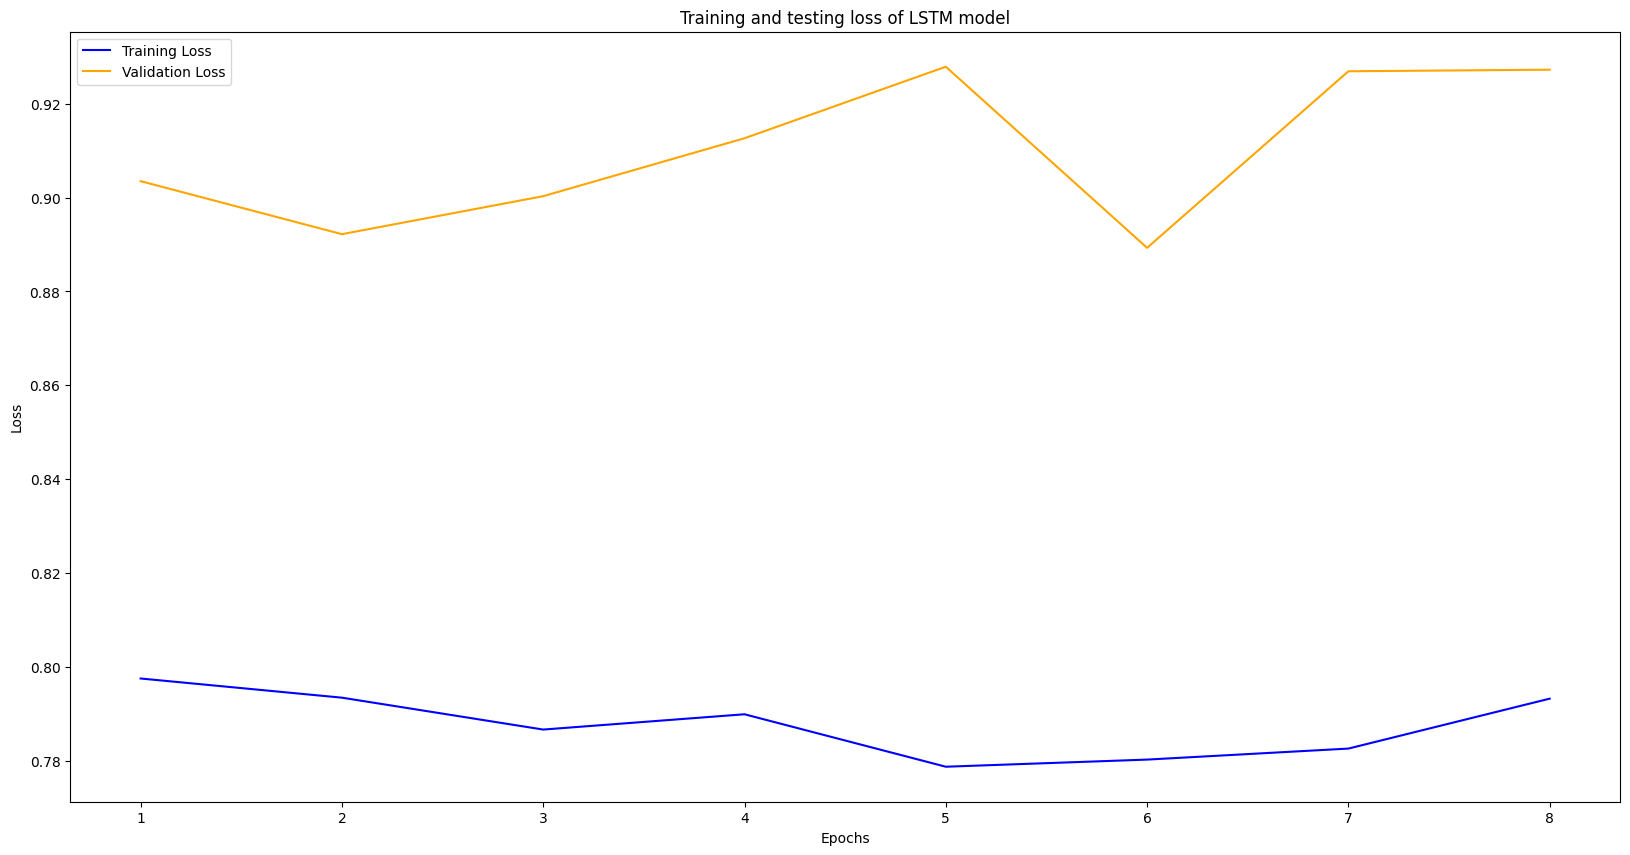

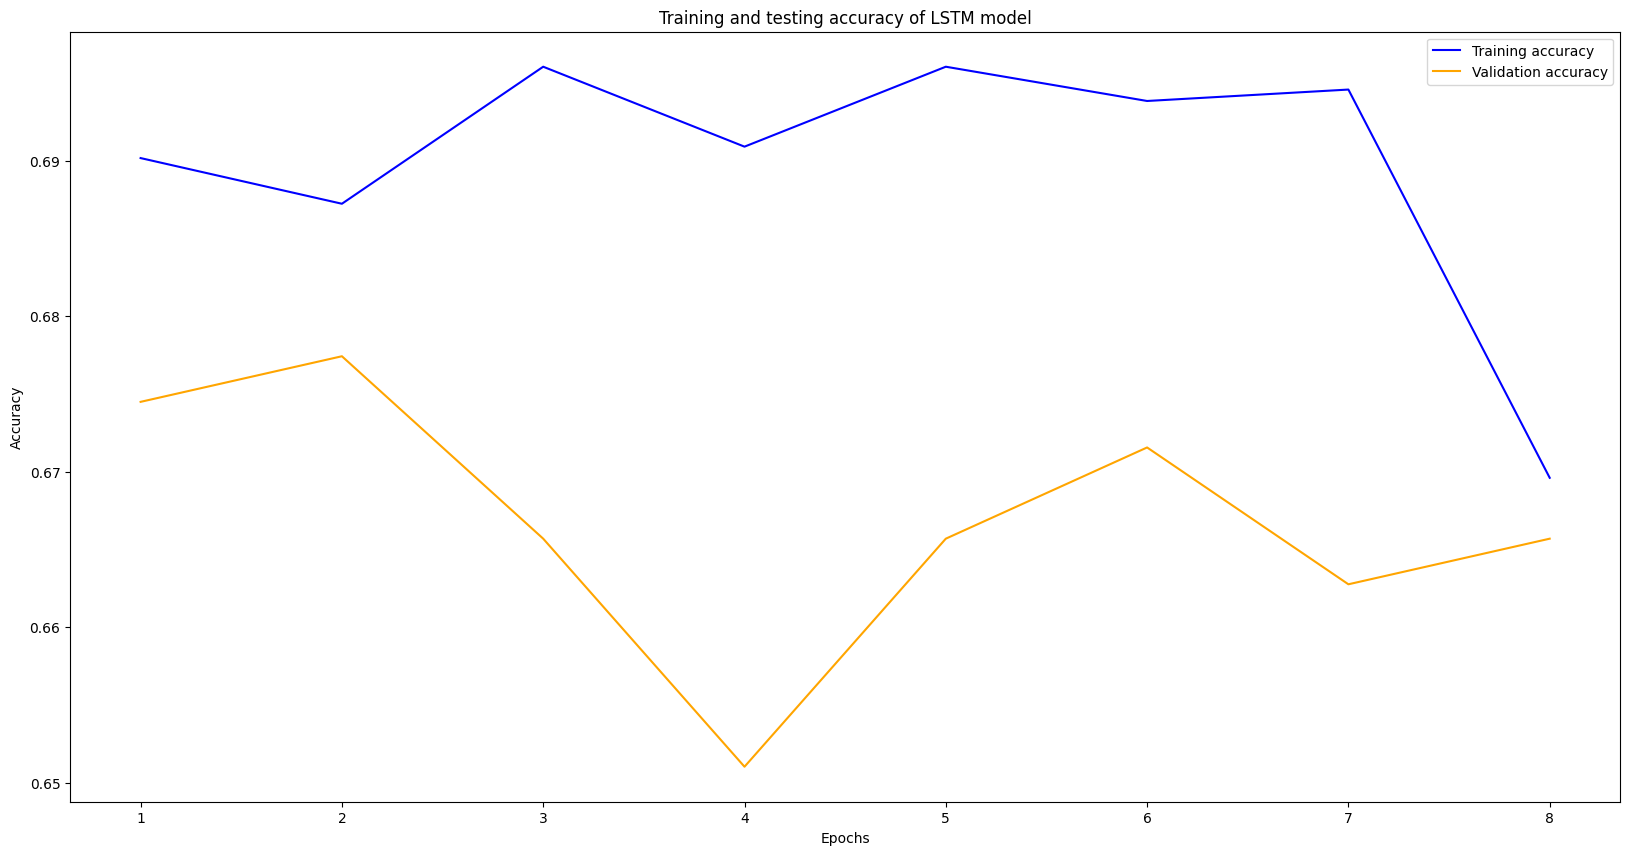

In [27]:
history_dict=LSTM_Model.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,9)

plt.figure(1,figsize=(20,10))
plt.plot(epochs,loss_values,'blue',label='Training Loss')
plt.plot(epochs,val_loss_values,'orange', label='Validation Loss')
plt.title('Training and testing loss of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2,figsize=(20,10))
plt.plot(epochs,acc_values,'blue', label='Training accuracy')
plt.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
plt.title('Training and testing accuracy of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'LSTM'}>

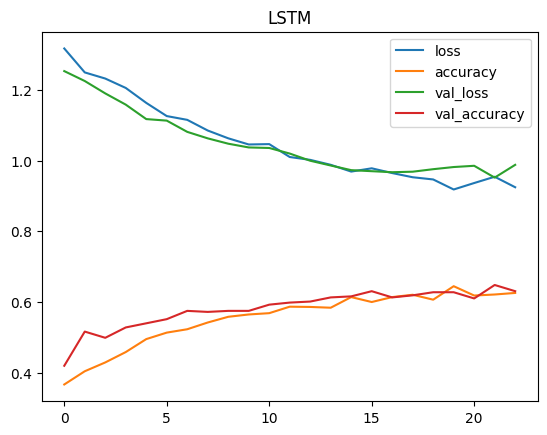

In [23]:
#1
Grap_Data_LSTM = pd.DataFrame(LSTM_Model.history)
Grap_Data_LSTM.plot(title='LSTM')

<AxesSubplot: title={'center': 'LSTM'}>

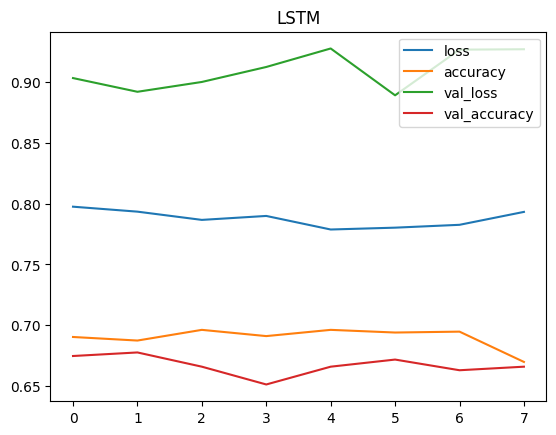

In [28]:
#2
Grap_Data_LSTM = pd.DataFrame(LSTM_Model.history)
Grap_Data_LSTM.plot(title='LSTM')

In [29]:
LSTM_model.save('saved_models/LSTM_model')

INFO:tensorflow:Assets written to: saved_models/LSTM_model\assets


INFO:tensorflow:Assets written to: saved_models/LSTM_model\assets


In [30]:
import tensorflow as tf
LSTM_model=tf.keras.models.load_model('saved_models/LSTM_model')

In [31]:
y_pred = LSTM_model.predict(X_test)

11/11 [==============================] - 3s 3ms/step


In [32]:
y_pred

array([[0.00458351, 0.02666105, 0.07885748, 0.88989794],
       [0.12179025, 0.4923229 , 0.3473231 , 0.03856378],
       [0.07322308, 0.15958324, 0.38599917, 0.38119447],
       ...,
       [0.213134  , 0.35257336, 0.11550974, 0.31878293],
       [0.21209888, 0.5080617 , 0.17815746, 0.10168196],
       [0.02418163, 0.76519305, 0.20580235, 0.00482298]], dtype=float32)

In [33]:
y_pred_labels=[]
for j in range (0,len(y_pred)):
    max=y_pred[j][0]
    index=0
    for i in range(1,len(y_pred[j])):
        if(y_pred[j][i]>max):
            max=y_pred[j][i]
            index=i
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_pred_labels.append(class_name)

In [34]:
y_test_labels=[]
for j in range (0,len(Y_test)):
    index=0
    for i in range(0,len(Y_test[j])):
        if(Y_test[j][i]==1):
            max=Y_test[j][i]
            index=i
            break
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_test_labels.append(class_name)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_labels, y_pred_labels)

In [36]:
cm_df = pd.DataFrame(cm, index = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'], 
                     columns = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'])
cm_df

,anti-coronavirus,antiviral,exp-non-antiviral,random-seq-non-antiviral
anti-coronavirus,0,13,6,3
antiviral,0,102,17,6
exp-non-antiviral,0,14,53,13
random-seq-non-antiviral,0,9,33,72


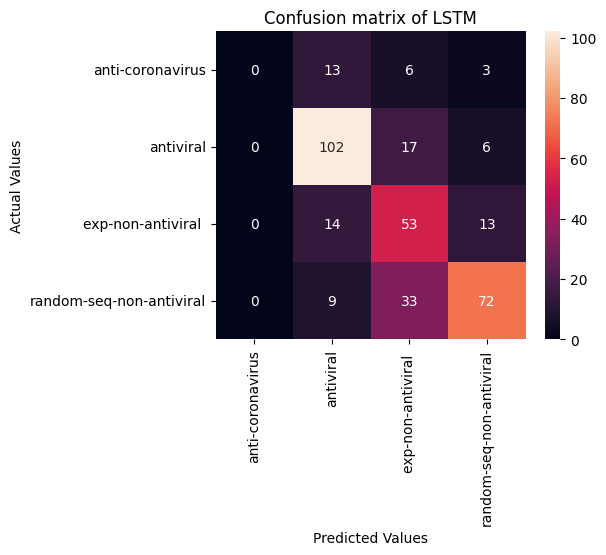

In [37]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True, fmt = 'd')
plt.title("Confusion matrix of LSTM")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [38]:
print('                   Classification report of LTSM')
print('                   -----------------------------')
print('')
print(classification_report(y_test_labels, y_pred_labels))

                   Classification report of LTSM
                   -----------------------------

                          precision    recall  f1-score   support

        anti-coronavirus       0.00      0.00      0.00        22
               antiviral       0.74      0.82      0.78       125
       exp-non-antiviral       0.49      0.66      0.56        80
random-seq-non-antiviral       0.77      0.63      0.69       114

                accuracy                           0.67       341
               macro avg       0.50      0.53      0.51       341
            weighted avg       0.64      0.67      0.65       341



In [39]:
def features_extractor(file_name):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [48]:
def print_prediction(file_name):
    prediction_feature = features_extractor(file_name) 
    prediction_feature = prediction_feature.reshape(1,1,50)
    predicted_vector = LSTM_model.predict(prediction_feature)
    predicted_vector = predicted_vector.flatten()
    max=predicted_vector[0]
    index=0
    for i in range(1,len(predicted_vector)):
        if(predicted_vector[i]>max):
            max=predicted_vector[i]
            index=i
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    print("The predicted class is:", class_name, '\n') 

In [50]:
filename = 'music-melodies/melody1517.wav' 
print_prediction(filename)

1/1 [==============================] - 0s 22ms/step
The predicted class is: random-seq-non-antiviral 



In [54]:
#
filename = 'music-melodies/melody1653.wav' 
print_prediction(filename)

1/1 [==============================] - 0s 23ms/step
The predicted class is: antiviral 



In [52]:
filename = 'music-melodies/melody289.wav' 
print_prediction(filename)

1/1 [==============================] - 0s 23ms/step
The predicted class is: antiviral 



In [51]:
filename = 'music-melodies/melody839.wav' 
print_prediction(filename)

1/1 [==============================] - 0s 23ms/step
The predicted class is: exp-non-antiviral 



# Music Wave and Test 

In [55]:
# Dictionary to be used for converting amino acid abbreviations

aa_3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S',
'GLN': 'Q', 'LYS':'K','ILE': 'I', 'PRO': 'P',
 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 'GLY': 'G',
 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
 'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

In [56]:
import pandas as pd
nu_df = pd.read_csv('aa_freq.csv', sep=',',header=0)
# replace NA's with 0's
nu_df.fillna(0,inplace=True)
nu_df

,Overtone,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,Ala(A),60,222,235,268,331,417,492,560,635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cys(C),53,101,178,206,249,276,338,429,485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asp(D),45,70,87,154,239,291,335,365,441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Glu(E),20,41,65,102,112,215,240,245,309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phe(F),29,54,58,94,181,241,290,295,315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Gly(G),66,240,290,455,544,603,707,833,853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,His(H),27,74,80,127,219,276,309,323,343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Ile(I),52,59,82,149,216,224,256,277,290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Lys(K),43,61,63,86,135,150,187,227,243,...,3565.0,3745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Leu(L),14,39,100,139,226,239,245,259,299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from scipy.constants import speed_of_light as speedlight
nu = nu_df.values

In [58]:
nu = nu_df.values
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if co == 0:
        #Convert amino acid code from 3 letter to 1 letter
            aa = nu[ro][co]
            aa = aa[0:3].upper()
            nu[ro][co]= aa_3to1[aa]
        else:
        # Convert from wavenumber to frequency
        # wavelength = 1/wavenumber
        # frequency = speed of light / wavelength
            if nu[ro][co] > 0:
                freq = speedlight / (1/nu[ro][co])

In [59]:
aa_list = nu[:,0]      # list of amino acids
nu = nu[:,1:]          # remove first column                
max_freq = nu.max()    # max and min 
min_freq = nu.min()    # need to exclude first column
human_range = 20000 - 20
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if nu[ro][co] > 0:
            # First scale to 0 to 1
            nu[ro][co] = (nu[ro][co] - min_freq)/ max_freq - min_freq
            # Scale to human hearing range 20 - 20000 Hz
            nu[ro][co] = (nu[ro][co] * human_range) + 20

In [60]:
def aa_note(aa,length):
    row = np.where(aa_list == aa)[0][0]
    print(row)
    wave = np.zeros(int(44100 * float(length)))
    harm = 0
 
    for freq in nu[row]:
        if freq == 0:
            break
        else:
            volume = np.exp(-harm)
            phases = np.cumsum(2.0 * np.pi * freq / 44100 * np.ones(int(44100 * float(length))))
            wave += np.sin(phases) * volume
            harm += 1
    # scale wave to values between 1 and -1
    wave = 2.*(wave - wave.min())/np.ptp(wave)-1
    return wave

In [61]:
from synthesizer import Player, Synthesizer
player = Player()
player.open_stream()

In [64]:
protein_sequence = input("Enter the protien sequence: ")

Enter the protien sequence: RVDLGDCIGKDARDAVV


In [63]:
unit_length = 0.5
melodic_sequence = []
for residue in protein_sequence:
    if residue!='[' and residue!="'" and residue!="]":
        sound_wave = aa_note(residue,unit_length)
        melodic_sequence = melodic_sequence + sound_wave.tolist()
test_melody = np.asarray(melodic_sequence)
test_melody = 2*(test_melody - test_melody.min())/np.ptp(test_melody)-1

14
17
2
9
5
2
1
7
5
8
2
0
14
2
0


In [65]:
from __future__ import print_function
import scipy.io.wavfile as wavf
import numpy as np
fs = 44100
out_f = 'test-melodies/test.wav'
wavf.write(out_f, fs, test_melody)

In [68]:
filename = 'test-melodies/test.wav'
print("Given Protien sequence input: ", protein_sequence)
print_prediction(filename) 

Given Protien sequence input:  RVDLGDCIGKDARDAVV
1/1 [==============================] - 0s 64ms/step
The predicted class is: exp-non-antiviral 

